<img style="border-radius: 0.5rem;" src="banner.jpg" />
<a style="margin-top: 1rem;" class="btn btn-lg btn-block btn-success" href="https://dsg.ucfsigai.org/fa18/signin/">
    Sign in (https://dsg.ucfsigai.org/fa18/signin/)
</a>

# Decision Trees
---
by: Chas Kane \([@ChasKane](github.com/ChasKane/)\), on 24 Oct 2018

### The Iris dataset
A common, very basic dataset, but it's great for explaining concepts. It consists of 150 data points with 4 numeric features and a target classification each. Think of the first 4 as being the inputs to an equation, and the target as the output.

```
(type of flower) = feature1 * feature2 * feature3 * feature4
```
That's a decent way to visualize it. The actual formula that maps petal and sepal dimensions to flower types is unknown to humanity. There is, however, some relationship between these features and what kind of flower you're looking at, and many ML algorithms have tried to figure it out over the years.

We're going to take a swing at it!

A quick note: the terms `flower name`, `class`, and `target` all refer to the same thing -- the thing we're trying to predict for each data point.

## "Hello world!" -decision tree

In [ ]:
# run everything after these two cells first!
display(graph_1)

In [ ]:
display(tiny_set_1)
display( tiny_set_1.loc[tiny_set["petal width (cm)"] <= .7] ) # the data received by the left child of the root
display( tiny_set_1.loc[tiny_set["petal width (cm)"] >  .7] ) # the data received by the right child of the root

This is our first look at a Dtree.
A pre-constructed decision tree like this takes **new** data in at the top and **asks that data the question** in the first line of the node. **If true**, it sends the data **left** down the tree, **otherwise right**.
* Leaf nodes represent the tree's final guess as to the class of the data flowing through it.
* It's a recursive algorithm you could code up yourself if you already knew the values and features to split on.

####  A few things to note:
* `gini` refers to the uncertainty of the data belonging to that node.
* `samples` is the total number of data points belonging to that node.
* `value` shows the distribution of the data, a number for each class.
* `class` is that node's best guess as to the class of all the data that would flow through it.


#### The real adventure is building/training the tree.
How would you build a Dtree to predict the flower type of any data point, given just the table on the left?
* Assume the samples in the table are representative of your data generally.
* Start with a single node that takes all 7 datapoints.
* You can choose one `feature` and one `value` for that feature to take on.
* How do you choose the `feature` and `value` to split on?

In [9]:
#ignore this cell; it's to make things print correctly
from IPython.display import HTML
HTML('<style>.output {flex-direction: row;}</style>') 

In [10]:
import numpy as np
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

# scikit-learn hosts many datasets for easy access
from sklearn.datasets import load_iris
iris_dict = load_iris()

feature_names = iris_dict.feature_names
flower_names = iris_dict.target_names

df_all = pd.DataFrame.from_records(iris_dict.data, columns=feature_names)
df_all = df_all.assign(target=iris_dict.target)

display(df_all)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


So that's all the data. To demonstrate the algo, let's split the data into two small, independant subsets.
* `tiny_set_1` and `tiny_set_2` will be 5% the size of the whole dataset.
* `train_test_split` will have different output each time, so don't get tripped up while presenting.



In [11]:
train_size  = 0.05
tiny_set_1, tiny_validation_1 = train_test_split(df_all, test_size=1-train_size)
tiny_set_2, tiny_validation_2 = train_test_split(df_all, test_size=1-train_size)

tiny_set_1 = tiny_set_1.drop("sepal length (cm)", axis=1)
tiny_set_1 = tiny_set_1.drop("sepal width (cm)", axis=1)

tiny_set_2 = tiny_set_2.drop("sepal length (cm)", axis=1)
tiny_set_2 = tiny_set_2.drop("sepal width (cm)", axis=1)

display(tiny_set_1)
display(tiny_set_2)

,petal length (cm),petal width (cm),target
117,6.7,2.2,2
93,3.3,1.0,1
6,1.4,0.3,0
95,4.2,1.2,1
86,4.7,1.5,1
127,4.9,1.8,2
92,4.0,1.2,1


,petal length (cm),petal width (cm),target
49,1.4,0.2,0
79,3.5,1.0,1
30,1.6,0.2,0
2,1.3,0.2,0
56,4.7,1.6,1
22,1.0,0.2,0
148,5.4,2.3,2


Ok, that's managable. What do we do with these subsets? Build Dtrees!
* `feature_cols` is a new dataframe that's exactly the same, but lacks the target column
* `class cols` is just the target column
* How to read lines `8` and `11`: "find a model that maps features to targets, so we can later predict targets based on features."

In [12]:
feature_cols_1 = tiny_set_1.drop(["target"], axis="columns", inplace=False)
class_cols_1   = tiny_set_1.loc[:, "target"]

feature_cols_2 = tiny_set_2.drop(["target"], axis="columns", inplace=False)
class_cols_2   = tiny_set_2.loc[:, "target"]

tiny_Dtree_1 = tree.DecisionTreeClassifier()
tiny_Dtree_1 = tiny_Dtree_1.fit(feature_cols_1, class_cols_1)

tiny_Dtree_2 = tree.DecisionTreeClassifier()
tiny_Dtree_2 = tiny_Dtree_2.fit(feature_cols_2, class_cols_2)

## And... Visualize!

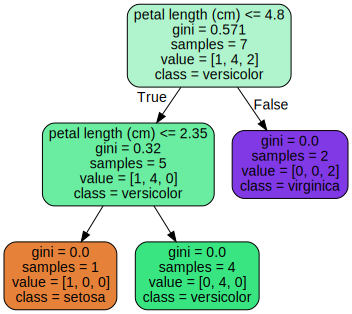

,petal length (cm),petal width (cm),target
117,6.7,2.2,2
93,3.3,1.0,1
6,1.4,0.3,0
95,4.2,1.2,1
86,4.7,1.5,1
127,4.9,1.8,2
92,4.0,1.2,1


In [20]:
tiny_dot_data_1 = tree.export_graphviz(
    tiny_Dtree_1,
    out_file = None,
    filled   = True,
    rounded  = True,
    feature_names = ["petal length (cm)", "petal width (cm)"],
    class_names   = flower_names,
)
graph_1 = graphviz.Source(tiny_dot_data_1)
display(graph_1)
display(tiny_set_1)

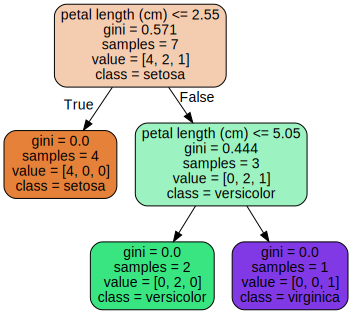

,petal length (cm),petal width (cm),target
49,1.4,0.2,0
79,3.5,1.0,1
30,1.6,0.2,0
2,1.3,0.2,0
56,4.7,1.6,1
22,1.0,0.2,0
148,5.4,2.3,2


In [14]:
tiny_dot_data_2 = tree.export_graphviz(
    tiny_Dtree_2,
    out_file = None,
    filled   = True,
    rounded  = True,
    feature_names = ["petal length (cm)", "petal width (cm)"],
    class_names   = flower_names,
)
graph_2 = graphviz.Source(tiny_dot_data_2)
display(graph_2)
display(tiny_set_2)

How to select features/split points:
http://www.learnbymarketing.com/481/decision-tree-flavors-gini-info-gain/

# That's all for single Dtrees. Do we have time for Random Forests?

In [21]:
from sklearn.ensemble import RandomForestRegressor

/anaconda3/envs/sigai-fa18/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/envs/sigai-fa18/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [31]:
df_raw = pd.read_csv("/Users/youngsage/Downloads/bulldozers/Train.csv")
pd.set_option("display.max_columns", None)
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500,1001274,4605,121,3.0,2004,508.0,Low,12/18/2008 0:00,310G,310,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Arizona,BL,Backhoe Loaders,Four Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Extended,Powershuttle,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000,772701,1937,121,3.0,1993,11540.0,High,8/26/2004 0:00,790ELC,790,E,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000,902002,3539,121,3.0,2001,4883.0,High,11/17/2005 0:00,416D,416,D,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Illinois,BL,Backhoe Loaders,Four Wheel Drive,OROPS,None or Unspecified,Reversible,No,Standard,Standard,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500,1036251,36003,121,3.0,2008,302.0,Low,8/27/2009 0:00,430HAG,430,HAG,NaN,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Texas,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,Manual,NaN,NaN,NaN,Rubber,None or Unspecified,None or Unspecified,None or Unspecif

In [44]:
m = RandomForestRegressor()
m.fit(df_raw.drop("SalePrice", axis=1), df_raw.loc[:,"SalePrice"])

ValueError: could not convert string to float: 

First error we see is "Conventional" can't be converted to float... looking at the data, 

In [43]:
df_raw = df_raw.replace(np.nan, '', regex=True)

df_raw.loc[:, "Steering_Controls"].unique()

array(['Conventional', '', 'Command Control', 'Four Wheel Standard',
       'Wheel', 'No'], dtype=object)

array(['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], dtype=object)